In [2]:
import pandas as pd
filename = "auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
df = pd.read_csv(filename, delim_whitespace=True, names=column_names)

print (df.shape)
df.head(6)

(397, 1)


,"18.0 8 307.0 130.0 3504. 12.0 70 1 ""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...
5,14.0 8 454.0 220.0 4354. 9...


In [2]:
horsepower_missing_ind = df[df.horsepower=='?'].index
df.loc[horsepower_missing_ind]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [3]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [3]:
df.loc[horsepower_missing_ind, 'horsepower'] = float('nan')
df.horsepower = df.horsepower.apply(pd.to_numeric)
df.loc[horsepower_missing_ind, 'horsepower'] = int( df.horsepower.mean() )

In [5]:
pd.set_option('precision', 2)
# display stats of the features
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,104.46,2970.42,15.57,76.01,1.57
std,7.82,1.70,104.27,38.20,846.84,2.76,3.70,0.80
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,1.00
25%,17.50,4.00,104.25,76.00,2223.75,13.83,73.00,1.00
50%,23.00,4.00,148.50,95.00,2803.50,15.50,76.00,1.00
75%,29.00,8.00,262.00,125.00,3608.00,17.17,79.00,2.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,3.00


In [4]:
df.to_csv('auto-mpg.csv', index=False)

In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.462312,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199230,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
import numpy  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn import *

/Users/bulent/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/bulent/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/bulent/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0

In [7]:
path='auto-mpg.csv'
dataset  = pd.read_csv(path)

In [8]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


The Intercept is:  [46.31736442]
The coefficient is:  [[-0.00767661]]
The response or outcome is:  [[27.12583926]]
The rank is:  1
Formula:  [[-0.00767661]] *x+ [46.31736442]


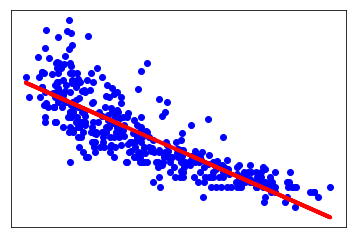

In [11]:
#Converting it into an NDarray object or array basically for only Weight and MPG columns
dataset = numpy.loadtxt(open(path, "rb"), delimiter=",", skiprows=1, usecols= (0,4))   

Y_parameters = dataset[:,0]                  #Saving the MPG in Y para
Y_parameters = Y_parameters.reshape((398,1)) #Reshaping (398,) to (1,398) as to make inputs of same dimesnsions
X_parameters = dataset[:, 1]                 #Saving Weight in X para
X_parameters = X_parameters.reshape((398,1)) #Reshaping (398,) to (1,398) as to make inputs of same dimesnsions
predict_value = 2500                         #Value for which we want the response

regr = linear_model.LinearRegression()       #Using our LM 
regr.fit(X_parameters, Y_parameters)         #Giving input parameters
predict_outcome = regr.predict(predict_value)#Saving our outcome for 2500

#Printing some basic elements of LM along with response or output from model for 2500
print("The Intercept is: ",regr.intercept_) 
print("The coefficient is: ", regr.coef_)
print("The response or outcome is: ", predict_outcome)
print("The rank is: ", regr.rank_)
print("Formula: ",regr.coef_,"*x+",regr.intercept_)

#Plotting our output and trends
plt.scatter(X_parameters,Y_parameters,color='blue')
plt.plot(X_parameters,regr.predict(X_parameters),color='red',linewidth=4)
plt.xticks(())
plt.yticks(())
plt.show()